# Carga de Datos y limpieza

In [ ]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')

In [7]:
#Cargamos el dataset y mostramos las 10 primeras filas
dataset = pd.read_csv("Mall_Customers.csv")
dataset.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [8]:
dataset.shape

(200, 5)

In [60]:
#Eliminamos las columnas Genero y ClienteID
data=dataset.drop(['CustomerID','Gender'], axis=1)

In [48]:
#Descripcion de los datos
data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [67]:
data = data.rename(columns={'Age':'Edad','Annual Income (k$)':'Ingresos Anuales (k$)','Spending Score (1-100)':'Puntuación de Gastos (1-100)'})

In [66]:
data.head(20)

,Edad,Ingresos Anuales (k$),Puntuación de Gastos (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3
9,30,19,72


In [68]:
#Columnas con valores nulos
data.isna().sum()

Edad                            0
Ingresos Anuales (k$)           0
Puntuación de Gastos (1-100)    0
dtype: int64

In [69]:
#Filtra y deja solo valores no nulos
data.dropna()

,Edad,Ingresos Anuales (k$),Puntuación de Gastos (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


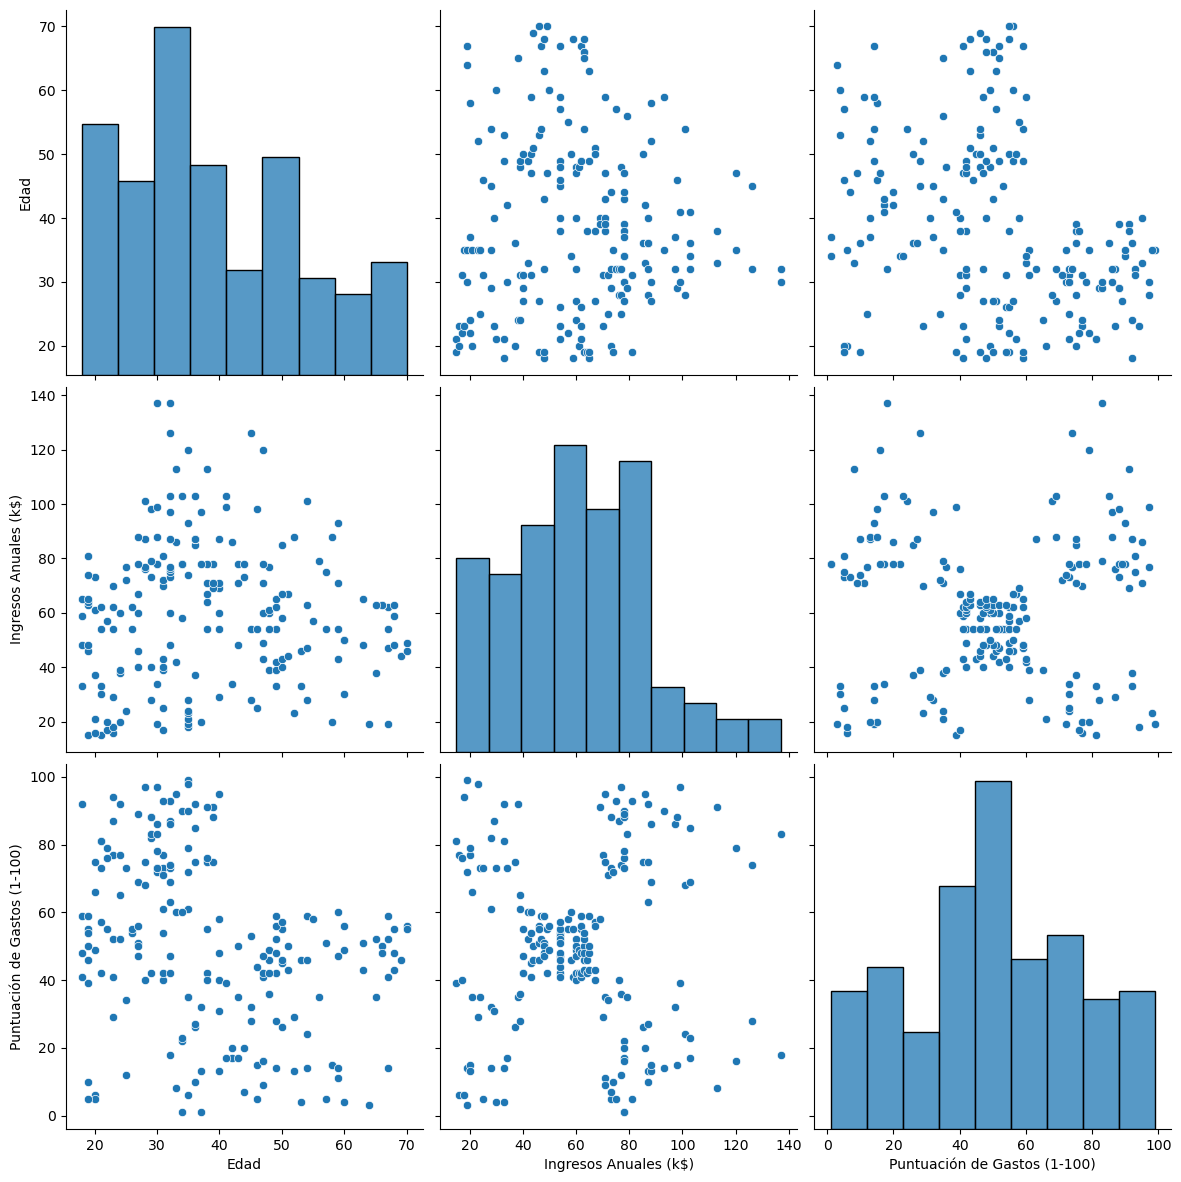

In [70]:
sns.pairplot(data.dropna(), size=4,kind='scatter')

In [71]:
# Matriz de correlación
corr_matrix = data.corr()
corr_matrix

,Edad,Ingresos Anuales (k$),Puntuación de Gastos (1-100)
Edad,1.000000,-0.012398,-0.327227
Ingresos Anuales (k$),-0.012398,1.000000,0.009903
Puntuación de Gastos (1-100),-0.327227,0.009903,1.000000


<Axes: >

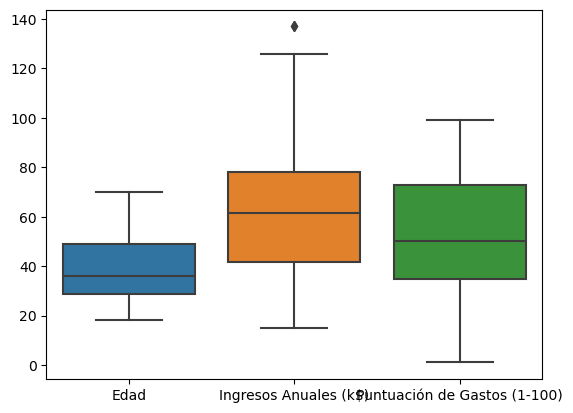

In [72]:
# Diagramas de caja para cada variable 
sns.boxplot(data=data)

In [73]:
# Estandarizar los datos antes de aplicar K-Means
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
X

,Edad,Ingresos Anuales (k$),Puntuación de Gastos (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


# K-MEANS

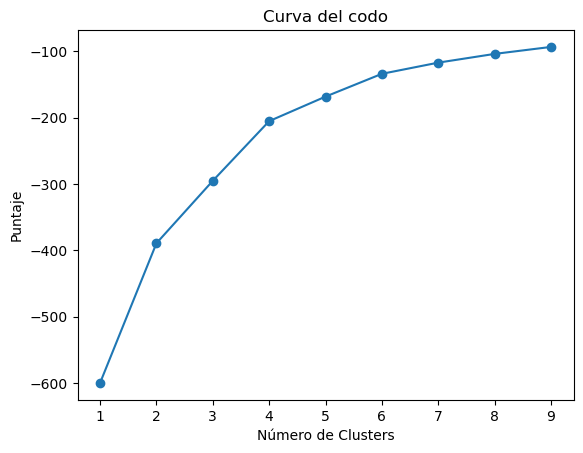

In [24]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Puntaje')
plt.title('Curva del codo')
plt.show()

In [82]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
centroids

array([[ 0.5310735 , -1.2905084 , -1.23646671],
       [-0.42880597,  0.97484722,  1.21608539],
       [ 1.20484056, -0.23577338, -0.05236781],
       [ 0.07333084,  0.97494509, -1.19729675],
       [-0.98067852, -0.74305983,  0.46744035]])

In [26]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = kmeans.labels_
# Obtenemos los centroids
C = kmeans.cluster_centers_
colores=['red','green','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row]) 

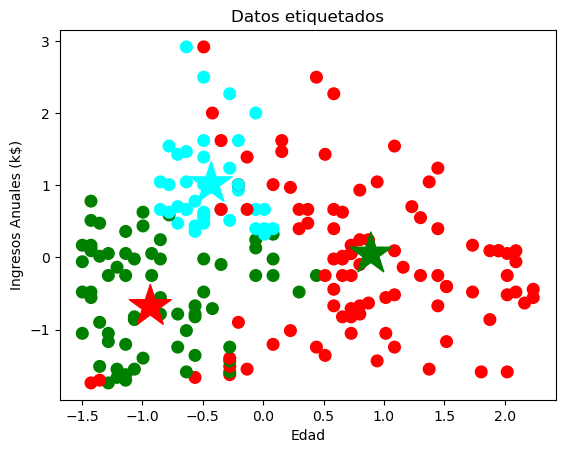

In [83]:
f1 = X['Edad'].values
f2 = X['Ingresos Anuales (k$)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('Edad')
plt.ylabel('Ingresos Anuales (k$)')
plt.show()

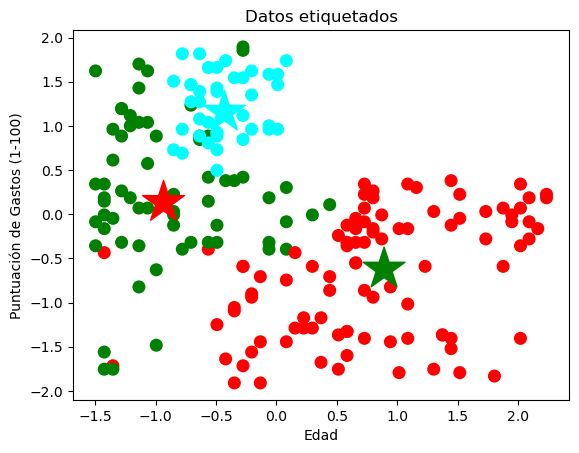

In [84]:
f1 = X['Edad'].values
f2 = X['Puntuación de Gastos (1-100)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('Edad')
plt.ylabel('Puntuación de Gastos (1-100)')
plt.show()

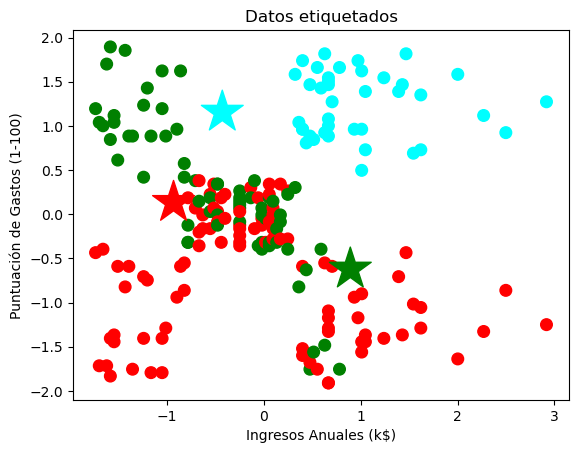

In [76]:
f1 = X['Ingresos Anuales (k$)'].values
f2 = X['Puntuación de Gastos (1-100)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('Ingresos Anuales (k$)')
plt.ylabel('Puntuación de Gastos (1-100)')
plt.show()

In [32]:
# Calcular medidas de calidad para K-Means
print("Medidas de calidad para K-Means:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels))
print("Inertia (suma de cuadrados dentro de los clusters):", kmeans.inertia_)
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels))

Medidas de calidad para K-Means:
Puntaje de silueta: 0.357793388710272
Índice de Calinski-Harabasz: 101.69494709193032
Inertia (suma de cuadrados dentro de los clusters): 295.2122461555488
Davies-Bouldin Index: 1.050270139649266


# Hierarchical Clustering

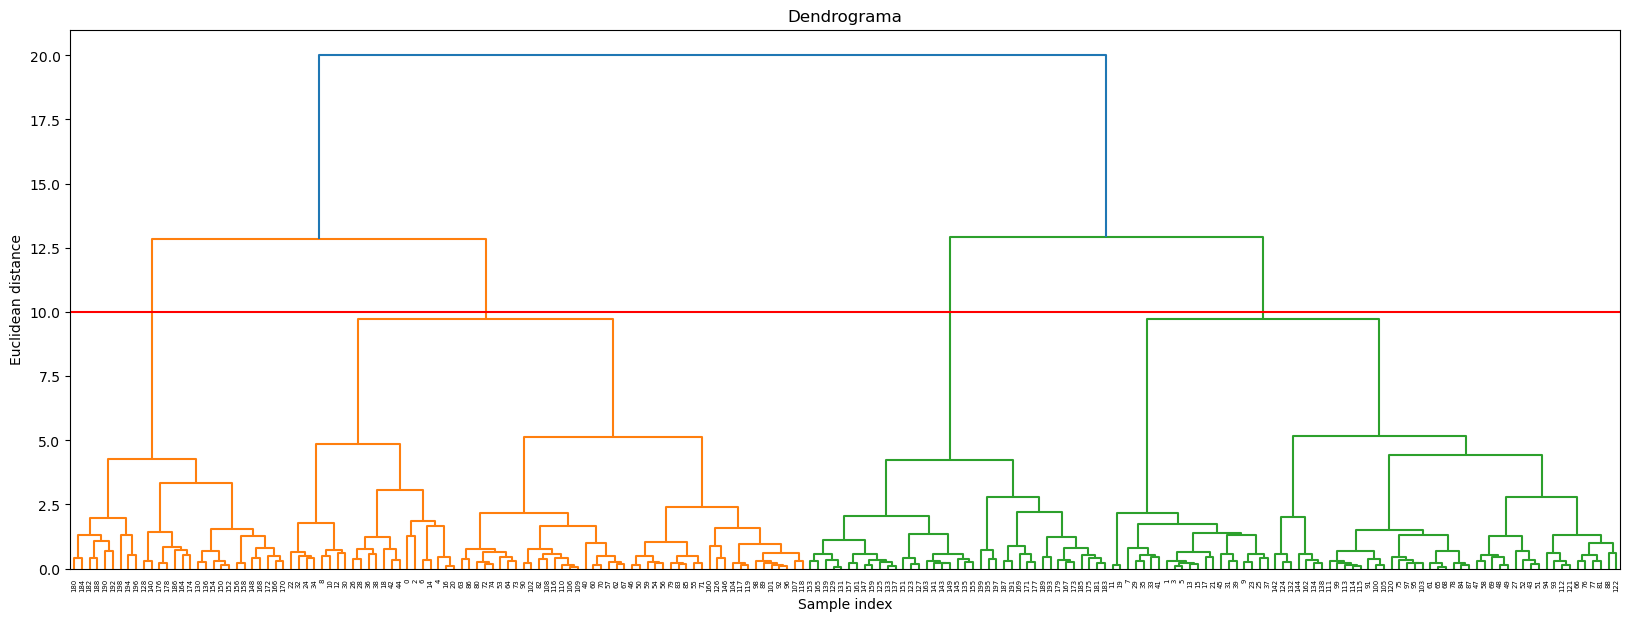

In [79]:
ward_clustering = linkage(X, method="ward", metric="euclidean")
plt.figure(figsize=(20, 7))
dendrogram(ward_clustering)
plt.axhline(y = 10, color = 'r', linestyle = '-')
plt.title('Dendrograma')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')
plt.show()

In [78]:
hier_clustering = AgglomerativeClustering(n_clusters=3)
labels_hier = hier_clustering.fit_predict(X)
labels_hier

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [35]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = labels_hier
colores=['red','green','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])

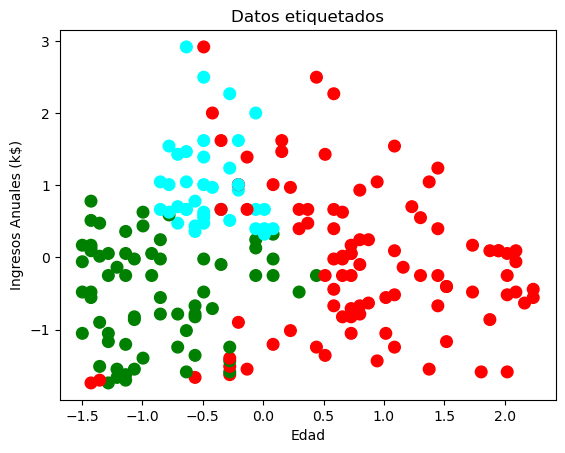

In [77]:
f1 = X['Edad'].values
f2 = X['Ingresos Anuales (k$)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.title('Datos etiquetados')
plt.xlabel('Edad')
plt.ylabel('Ingresos Anuales (k$)')
plt.show()

In [40]:
def plot_dendrogram(model, **kwargs):
    '''
    Esta función extrae la información de un modelo AgglomerativeClustering.
    y traza su dendrograma con la función dendrograma de scipy.cluster.hierarchy
    '''
    from scipy.cluster.hierarchy import dendrogram
    import numpy as np    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    distances = np.arange(model.children_.shape[0])
    linkage_matrix = np.column_stack([model.children_, distances, counts]).astype(float)
    # Plot
    plt.figure(figsize=(20, 7))
    dendrogram(linkage_matrix, **kwargs)
    plt.title('Dendrograma')
    plt.xlabel('Sample index')
    plt.ylabel('Euclidean distance')
    plt.show()

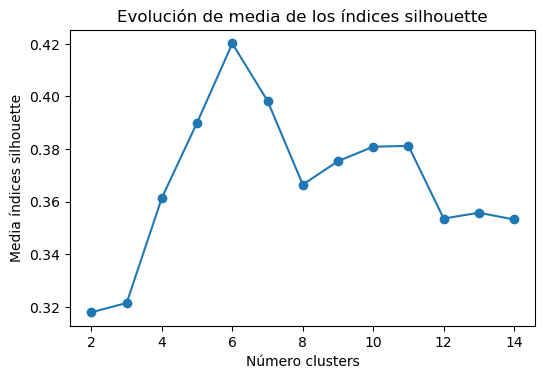

In [41]:
# Método silhouette para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(2, 15)
valores_medios_silhouette = []
for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    affinity   = 'euclidean',
                    linkage    = 'ward',
                    n_clusters = n_clusters
             )
    cluster_labels = modelo.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

In [42]:
# Calcular medidas de calidad para Clustering Jerárquico
print("\nMedidas de calidad para Clustering Jerárquico:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels_hier))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels_hier))
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels_hier))


Medidas de calidad para Clustering Jerárquico:
Puntaje de silueta: 0.32148866683112387
Índice de Calinski-Harabasz: 88.10174149244529
Davies-Bouldin Index: 1.1277290061047862


In [80]:
# Calcular el coeficiente de correlación cofenética
from scipy.cluster.hierarchy import linkage
# Compute the distances
X_dist = pdist(X)
# Compute the linkage matrix
Z = linkage(X, 'ward')
# Calculate the cophenetic correlation coefficient
coef_cofenetico = cophenet(Z, X_dist)
print("Coeficiente de correlación cofenética:", coef_cofenetico)

Coeficiente de correlación cofenética: (0.6261774947075186, array([20.00004498,  1.28368768, 20.00004498, ..., 20.00004498,
        0.74145991, 20.00004498]))
